 

<p style="text-align: center; font-size: 22px; line-height: 1.5">Корреляция<br>и<br>корреляционный анализ</p>


Ганнова Анфиса

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 11,7
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
water = pd.read_csv('water.csv')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


### точечный график

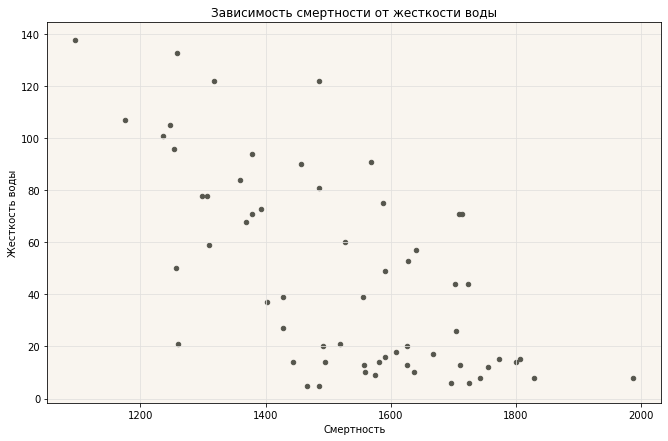

In [3]:
fig = water.plot(kind='scatter', x='mortality', y='hardness', color='#56564D')
fig.set_facecolor('#F9F5EF')
plt.xlabel('Смертность') 
plt.ylabel('Жесткость воды') 
plt.grid(color = '#E2E0DE')
plt.title('Зависимость смертности от жесткости воды') 
plt.show()


<p style="color: green; text-align: center; font-size: 18px; line-height: 1.5">На графике видна средняя корреляция</p>


### расчитываю коэффициент корреляции по методам Пирсона и Спирмена

In [4]:
print('Парная корреляция по Пирсону')
water[['hardness', 'mortality']].corr()

Парная корреляция по Пирсону


,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
print('Парная корреляция по Спирмену')
water[['hardness', 'mortality']].corr(method='spearman')

Парная корреляция по Спирмену


,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


<p style="color: green; text-align: center; font-size: 18px; line-height: 1.5">
    Расчеты по обоим методам говорят о средней отрицательной корреляции
</p>

###  модель линейной регрессии
    

In [6]:
Z = water[['hardness']]
x = water['mortality']

In [7]:
Z_train, Z_test, x_train, x_test = train_test_split(Z, x, test_size=0.30, random_state=42)

In [8]:
model = LinearRegression()
model.fit(Z_train, x_train)  
model.intercept_

1668.9722977277095

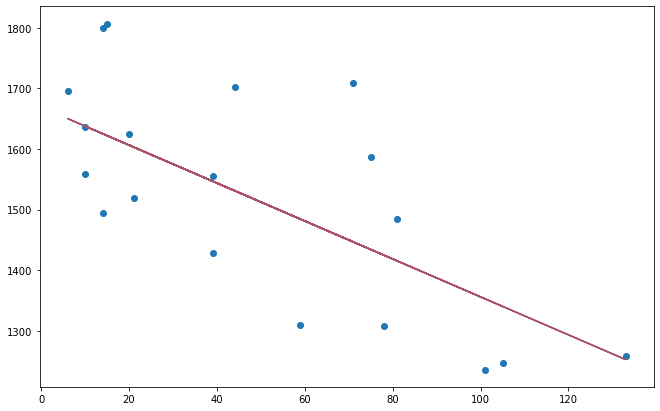

In [9]:
x_pred = model.predict(Z_test)
plt.scatter(Z_test, x_test)
plt.plot(Z_test, x_pred, c='#AA5267')

###  коэффициент детерминации
    

In [10]:
model.score(Z_test, x_test) 

0.5046490611017092

-  0,5 → точность подбора уравнения регрессии - средняя

###  график остатков


In [11]:
Z_const = sm.add_constant(Z_train) 

/Users/anfisso/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
model = sm.OLS(x_train, Z_const)
Z_const = sm.add_constant(Z_train) 
results = model.fit()

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

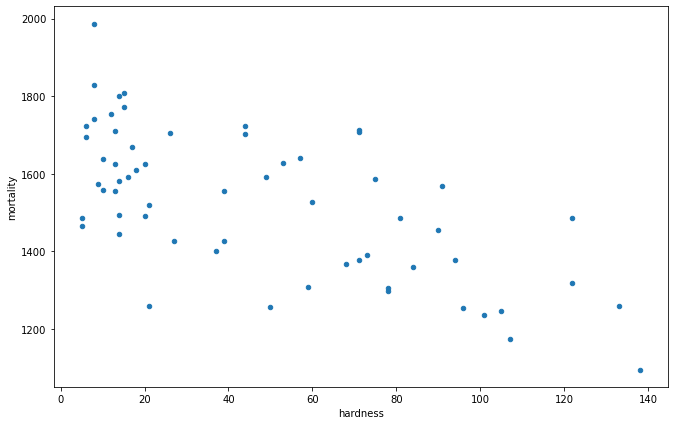

In [13]:
water.plot(kind='scatter', x='hardness',
y = 'mortality')

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

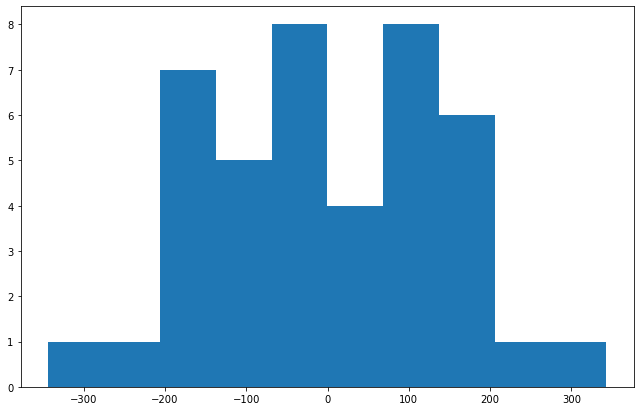

In [14]:
plt.hist(results.resid)

# вывод: зависимость есть, умеренно положительная
- график остатков - ненормальный

### разделим массив на северную и южную локации 

In [15]:
south = water[(water.location == 'South')]
north = water[(water.location == 'North')]

In [16]:
south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [17]:
north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15



Зависимость смертности от жесткости воды по регионам


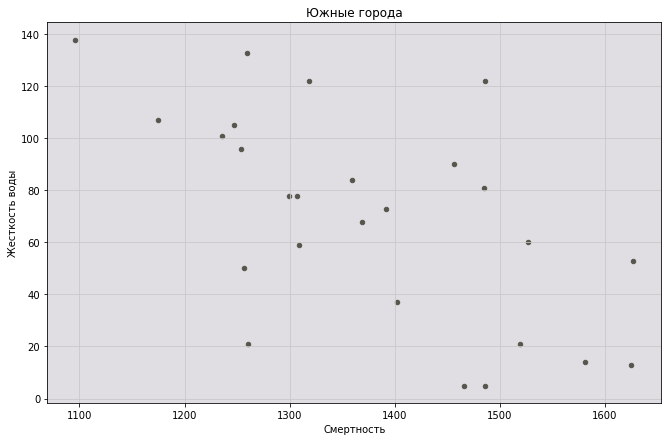

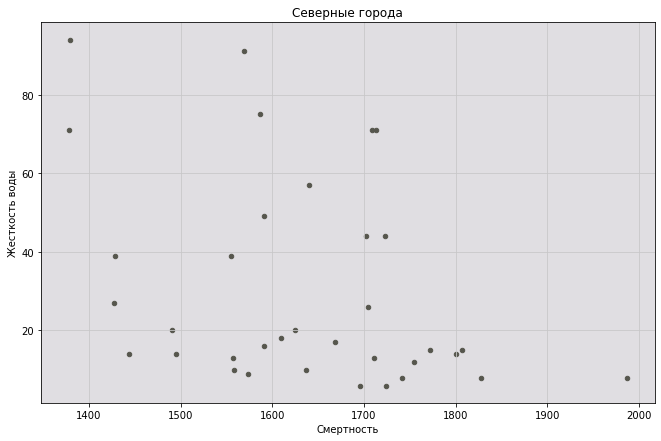

In [18]:
print('\nЗависимость смертности от жесткости воды по регионам')

fig1 = south.plot(kind='scatter', x='mortality', y='hardness', color='#56564D')
fig1.set_facecolor('#E0DEE2')
plt.xlabel('Смертность') 
plt.title('Южные города') 
plt.ylabel('Жесткость воды') 
plt.grid(color = '#C7C7C8')



fig2 = north.plot(kind='scatter', x='mortality', y='hardness', color='#56564D')
fig2.set_facecolor('#E0DEE2')
plt.xlabel('Смертность') 
plt.ylabel('Жесткость воды') 
plt.grid(color = '#C7C7C8')
plt.title('Северные города') 
plt.show()

###  корреляция
#### юг

In [19]:
#  Пирсон 
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [20]:
# Спирмен 
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


###  корреляция
#### север

In [21]:
#  Пирсон 
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [22]:
# Спирмен 
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


#### мы видим, что в южных городах смертность носит более зависимый характер от свойств воды

### Посчитаем модель линейной регрессии 

#### юг

In [23]:
S = south[['hardness']]
i = south['mortality']
S_train, S_test, i_train, i_test = train_test_split(S, i, test_size=0.20, random_state=90)

In [24]:
model = LinearRegression()
model.fit(S_train, i_train)  
model.intercept_

1461.66299436604

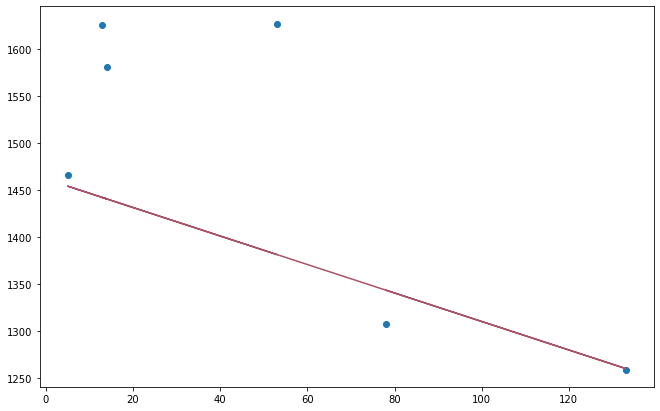

In [25]:
i_pred = model.predict(S_test)
plt.scatter(S_test, i_test)
plt.plot(S_test, i_pred, c='#AA5267')


#### Север 

In [26]:
N = north[['hardness']] 
r = north['mortality']
N_train, N_test, r_train, r_test = train_test_split(N, r, test_size=0.30, random_state=42)

In [27]:
model = LinearRegression()
model.fit(N_train, r_train)  
model.intercept_

1688.150229031281

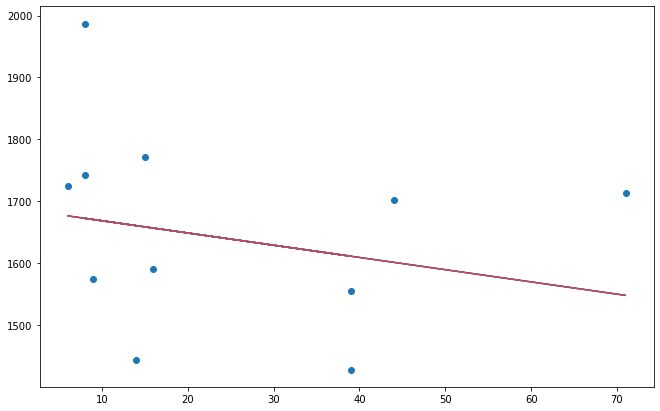

In [28]:
r_pred = model.predict(N_test)
plt.scatter(N_test, r_test)
plt.plot(N_test, r_pred, c='#AA5267')


### Коэффициент детерминации 

##### юг

In [29]:
model.score(S_test, i_test)

-0.01559768154286667

##### север

In [30]:
model.score(N_test, r_test)

0.018885304285745863

<p style="color: green; text-align: center; font-size: 18px; line-height: 1.5">Для южной части гродов коэффицоент детерминации был менее -4, я уменьшила объем для теста и увеличила количество случайных расщеплений - коэффициент увеличился, По северным городам коэффициент максимально близок к нулю </p>

###  график остатков по регионам


#### юг

In [31]:
S_const = sm.add_constant(S_train) 

/Users/anfisso/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
model = sm.OLS(i_train, S_const)
S_const = sm.add_constant(S_train) 
results_s = model.fit()

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

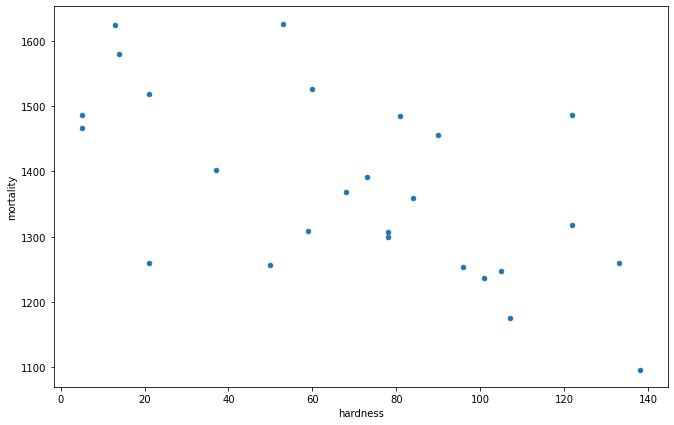

In [33]:
south.plot(kind='scatter', x='hardness',
y = 'mortality')

(array([2., 2., 3., 2., 2., 4., 1., 1., 2., 1.]),
 array([-169.82738328, -131.91597032,  -94.00455737,  -56.09314442,
         -18.18173147,   19.72968149,   57.64109444,   95.55250739,
         133.46392034,  171.3753333 ,  209.28674625]),
 <BarContainer object of 10 artists>)

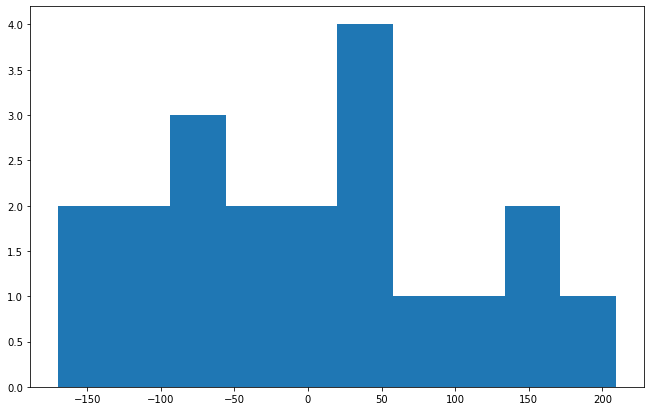

In [34]:
plt.hist(results_s.resid)

#### север

In [35]:
N_const = sm.add_constant(N_train) 

In [36]:
model = sm.OLS(r_train, N_const)
N_const = sm.add_constant(N_train) 
results_n = model.fit()

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

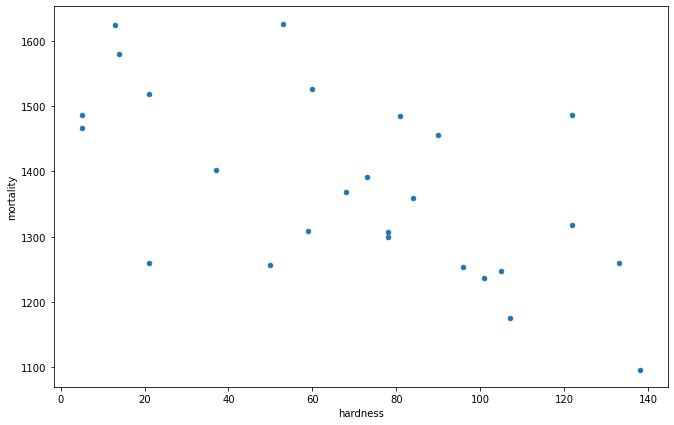

In [37]:
south.plot(kind='scatter', x='hardness',
y = 'mortality')

(array([1., 3., 3., 0., 3., 2., 3., 3., 2., 4.]),
 array([-207.77494801, -170.87675407, -133.97856012,  -97.08036618,
         -60.18217223,  -23.28397829,   13.61421566,   50.5124096 ,
          87.41060354,  124.30879749,  161.20699143]),
 <BarContainer object of 10 artists>)

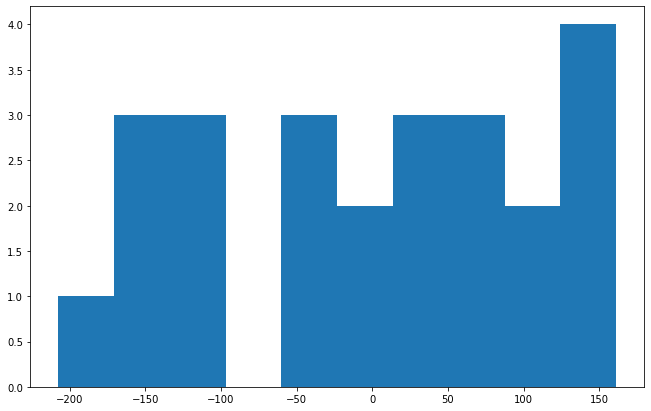

In [38]:
plt.hist(results_n.resid)

## * 
## судя по корреляции, я скажу что южные города имеют большую зависимость от жесткости воды. По графикам распределения остатков по южным городам можно наблюдать, что затрагивается паттерн нормального распределения. В северных городах ненормальное распределение → не могу сделать какой-либо вывод, нет информации